In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/home/awantik/Downloads/time_series_2019-ncov-Confirmed.csv')

### What is this data all about ?

* Time is column, every day a new column is added
* A Country can be represented into multiple state/province

In [4]:
data.sample(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
123,New Hampshire,US,43.4525,-71.5639,0,0,0,0,0,0,...,7,13,17,26,26,44,44,55,65,65.0
283,"Lee County, FL",US,26.6630,-81.9535,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
81,NaN,Costa Rica,9.7489,-83.7534,0,0,0,0,0,0,...,26,27,35,41,50,69,89,117,134,134.0
138,Louisiana,US,31.1695,-91.8678,0,0,0,0,0,0,...,77,91,136,196,257,392,538,585,837,837.0
103,Grand Princess,US,37.6489,-122.6655,0,0,0,0,0,0,...,21,21,20,21,21,22,23,23,30,30.0
192,NaN,Russia,60.0000,90.0000,0,0,0,0,0,0,...,59,63,90,114,147,199,253,306,367,367.0
117,Virginia,US,37.7693,-78.1700,0,0,0,0,0,0,...,41,45,49,67,77,99,122,156,221,221.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
185,Jilin,China,43.6661,126.1923,0,1,3,4,4,6,...,93,93,93,93,93,93,93,93,93,93.0
209,"Kitsap, WA",US,47.6477,-122.6413,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


* Question : Transform the data country specific
* Combine all states data of the country

In [5]:
data['Country/Region'].value_counts()

US            249
China          33
Canada         12
France          9
Australia       9
             ... 
Finland         1
Qatar           1
Kosovo          1
East Timor      1
Iraq            1
Name: Country/Region, Length: 183, dtype: int64

In [14]:
data = data.drop(['Lat','Long'], axis=1)

In [63]:
country_data = data.groupby('Country/Region',axis = 0).sum()

In [64]:
country_data = country_data.T

In [65]:
country_data.index = pd.to_datetime(country_data.index)

In [66]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62 entries, 2020-01-22 to 2020-03-23
Columns: 183 entries, Afghanistan to Zimbabwe
dtypes: float64(183)
memory usage: 89.1 KB


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

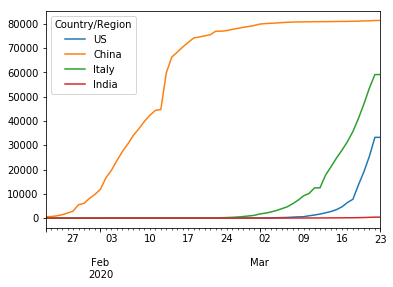

In [34]:
country_data[['US','China','Italy','India']].plot()

In [35]:
country_data

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2020-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2020-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2020-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2020-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,4.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0


In [44]:
top5 = list(country_data.loc['2020-03-23'].sort_values(ascending=False)[:6].index.values)

* Status of countries leading in the chart

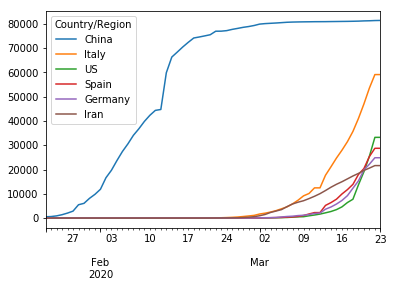

In [45]:
country_data[top5].plot()

* Status of US

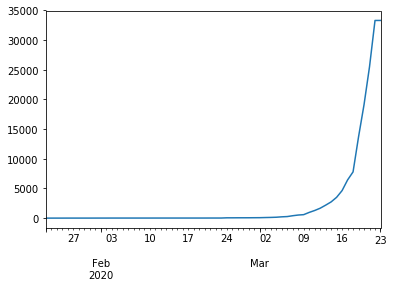

In [47]:
country_data.US.plot()

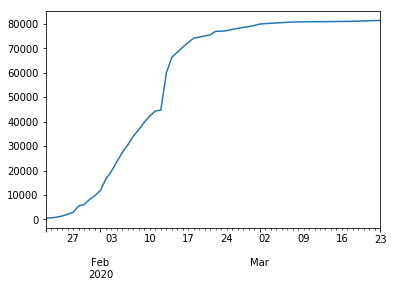

In [48]:
country_data.China.plot()

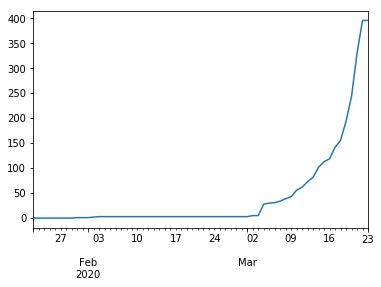

In [49]:
country_data.India.plot()

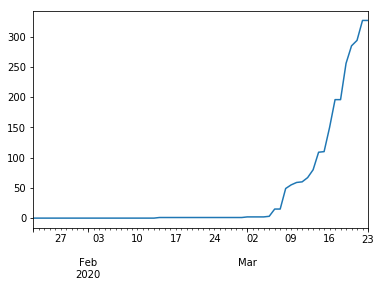

In [51]:
country_data.Egypt.plot()

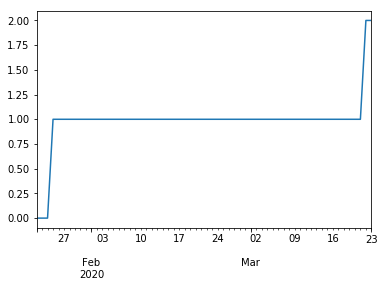

In [52]:
country_data.Nepal.plot()

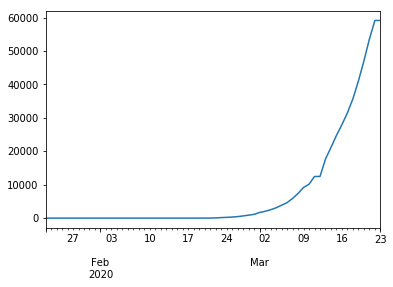

In [53]:
country_data.Italy.plot()

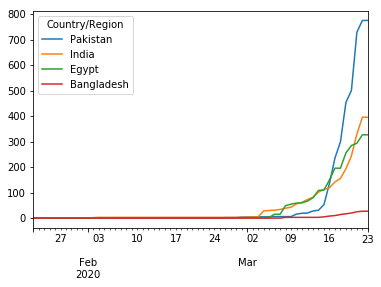

In [57]:
country_data[['Pakistan','India','Egypt','Bangladesh']].plot()

In [60]:
country_deaths = pd.read_csv('/home/awantik/Downloads/time_series_covid19_deaths_global.csv')

In [61]:
country_deaths = country_deaths.groupby('Country/Region',axis = 0).sum()

In [69]:
country_deaths = country_deaths.drop(['Lat','Long'],axis=1)

In [71]:
country_deaths = country_deaths.T

In [72]:
country_deaths.index = pd.to_datetime(country_deaths.index)

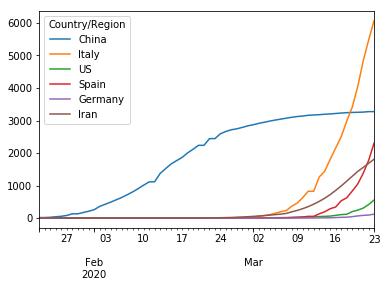

In [74]:
country_deaths[top5].plot()

* Which country is doing more testing & taking better care of patients

In [78]:
res = country_deaths.loc['2020-03-23']/country_data.loc['2020-03-23']

In [79]:
res.sort_values(ascending=False)

Country/Region
Sudan                    0.500000
Zimbabwe                 0.333333
Gabon                    0.200000
Guyana                   0.142857
San Marino               0.125000
                           ...   
Puerto Rico                   NaN
Republic of the Congo         NaN
Reunion                       NaN
The Bahamas                   NaN
The Gambia                    NaN
Name: 2020-03-23 00:00:00, Length: 186, dtype: float64

In [80]:
country_deaths.loc['2020-03-23'].Sudan

1

In [81]:
country_data.loc['2020-03-23'].Sudan

2.0

In [103]:
res_above50 = country_data.loc['2020-03-23'] > 50

In [104]:
res_above50[res_above50 == True].index

Index(['Albania', 'Algeria', 'Andorra', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Belarus', 'Belgium',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Canada', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Cruise Ship', 'Cyprus', 'Czechia', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia', 'Finland',
       'France', 'Georgia', 'Germany', 'Greece', 'Guadeloupe', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Jordan', 'Kazakhstan', 'Korea, South', 'Kuwait',
       'Latvia', 'Lebanon', 'Lithuania', 'Luxembourg', 'Malaysia', 'Malta',
       'Mexico', 'Moldova', 'Morocco', 'Netherlands', 'New Zealand',
       'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia',
       'San Marino', 'Saudi Arabia', 'Senegal', '

In [106]:
deaths = country_deaths.loc['2020-03-23']

In [108]:
res_above50_deaths = deaths[res_above50[res_above50 == True].index]

In [111]:
affected = country_data.loc['2020-03-23']

In [112]:
res_above50_data = affected[res_above50[res_above50 == True].index]

In [113]:
res_above50_data

Country/Region
Albania                   89.0
Algeria                  201.0
Andorra                  113.0
Argentina                225.0
Armenia                  194.0
                         ...  
United Arab Emirates     153.0
United Kingdom          5741.0
Uruguay                  135.0
Venezuela                 70.0
Vietnam                  113.0
Name: 2020-03-23 00:00:00, Length: 97, dtype: float64

In [114]:
res_above50_deaths

Country/Region
Albania                   4.0
Algeria                  17.0
Andorra                   1.0
Argentina                 4.0
Armenia                   0.0
                        ...  
United Arab Emirates      2.0
United Kingdom          336.0
Uruguay                   0.0
Venezuela                 0.0
Vietnam                   0.0
Name: 2020-03-23 00:00:00, Length: 97, dtype: float64

In [116]:
final = res_above50_deaths / res_above50_data

In [117]:
final.sort_values(ascending=False)

Country/Region
San Marino     0.125000
Italy          0.102760
Iraq           0.098712
Indonesia      0.095331
Philippines    0.086842
                 ...   
Kuwait         0.000000
Venezuela      0.000000
Jordan         0.000000
Kazakhstan     0.000000
Guadeloupe          NaN
Name: 2020-03-23 00:00:00, Length: 97, dtype: float64

In [121]:
final['China']

0.04020186888345879